In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('data/HCLTECH.csv')
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1327 non-null   datetime64[ns]
 1   Open       1327 non-null   float64       
 2   High       1327 non-null   float64       
 3   Low        1327 non-null   float64       
 4   Close      1327 non-null   float64       
 5   Adj Close  1327 non-null   float64       
 6   Volume     1327 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 72.7 KB


In [13]:
df.set_index('Date', inplace=True)

In [14]:
ts = df.High
ts

Date
2017-04-24    412.000000
2017-04-25    412.924988
2017-04-26    411.000000
2017-04-27    410.000000
2017-04-28    410.000000
                 ...    
2022-08-26    956.000000
2022-08-29    922.000000
2022-08-30    945.250000
2022-09-01    931.000000
2022-09-02    937.000000
Name: High, Length: 1327, dtype: float64

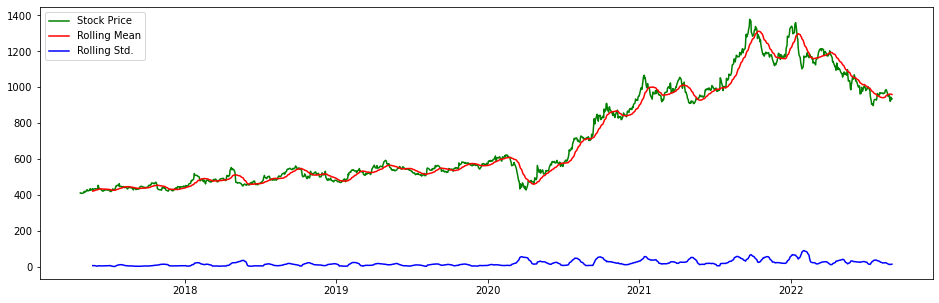

In [26]:
plt.figure(figsize=(16,5))
plt.plot(df.High, label='Stock Price', c='g');
plt.plot(df.High.rolling(22).mean(), 'r', label='Rolling Mean')
plt.plot(df.High.rolling(22).std(), 'b', label='Rolling Std.')
plt.legend()

In [31]:
from statsmodels.tsa.stattools import adfuller, kpss

In [40]:
p_value = adfuller(ts)[1]
p_value

0.7381421145120028

p_value > 0.05 Terima Ho, data tak stasioner

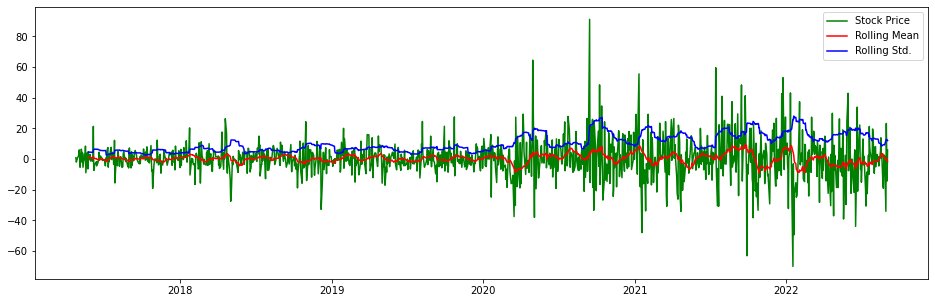

In [74]:
plt.figure(figsize=(16,5))
plt.plot(ts_dif1, label='Stock Price', c='g');
plt.plot(ts_dif1.rolling(22).mean(), 'r', label='Rolling Mean');
plt.plot(ts_dif1.rolling(22).std(), 'b', label='Rolling Std.');
plt.legend()

In [51]:
kpss(ts)[1]

C:\Users\Uswatun Hasanah\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


0.01

p_value < 0.05, tolak Ho, data tak stasioner

In [50]:
ts_dif1 = ts - ts.shift()
ts_dif1.dropna(inplace=True)
adfuller(ts_dif1)[0]

-8.263827693481526

p_value < 0.05, tolak Ho, data stasioner

In [64]:
kpss(ts_dif1)[1]

0.1

p_value> 0.05, terima Ho, data stasioner

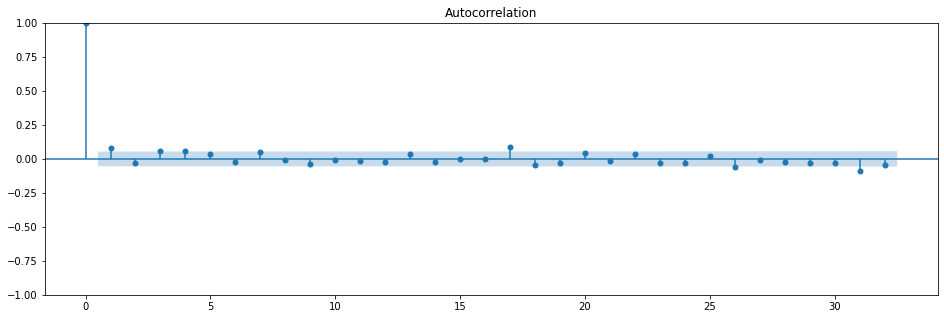

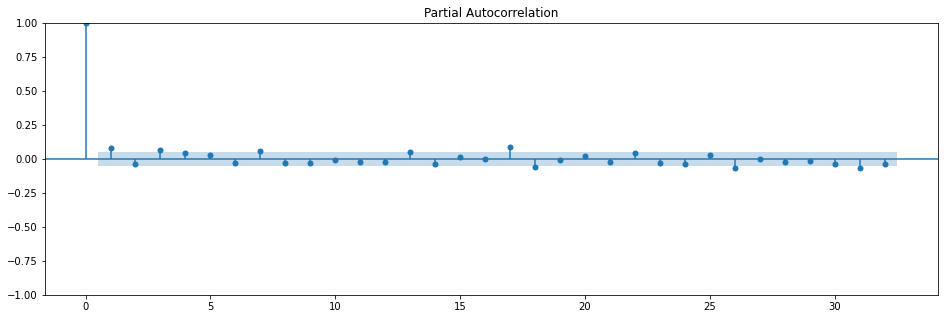

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams['figure.figsize'] = (16,5)
# plt.figure()
# plt.subplot(121)
plot_acf(ts_dif1);
plot_pacf(ts_dif1);
# plt.subplot(122)



In [87]:
from statsmodels.tsa.api import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# def arima_model(ts,p,d,q):
#     ts = ts.values
#     split = int(.7*len(ts))
#     x_train = ts[0: split]
#     x_test = ts[split : ]
#     model = ARIMA(ts, order=(p,d,q))
#     model.fit()
# #     pred = model.forecast(x_test)
    
# #     rmse = mean_squared_error(pred, x_test)**.5
# #     print(f'RMSE Arima({p},{d},{q}) : {rmse}')
    
    
# # p = np.arange(1)
# # d = np.arange(1)
# # q = np.arange(1)

# # for p in p:
# #     for d in d:
# #         for q in q:
# #             arima_model(ts,p,d,q)

# # GridSearchCV(arima_model(ts_dif1), param_grid=)
# arima_model(ts_dif1,0,0,1)

In [ ]:
split = int(.7*len(ts_dif1))
x_train = ts_dif1[:split]
x_test = ts_dif1[split:]
model = ARIMA(ts_dif1, order=(1,1,1))
res = model.fit()

In [134]:
pred = []
hist = [x for x in x_train]
for t in range(len(x_test)):
    model = ARIMA(hist, order=(1,1,1))
    res = model.fit()
    temp = res.forecast()[0]
    pred.append(temp)
#     print(temp)
    hist.append(x_test[t])

1.3158114176677778
1.3703831197425256
0.29605842934663684
0.7031446961344816
0.9069997272926904
0.3640587428852964
1.836776459417699
1.4472491972062862
1.0449022404361656
0.8731736672917325
1.0687886779687714
1.6734934821302812
0.6299871205030065
1.2710779536153014
1.5341998168072806
0.7389737621143215
0.7745492461385091
0.8585590983527345
0.8929080854169884
0.9653646184904264
0.7203441042114811
0.15129447415636577
0.3424593488538825
1.1487470359221739
0.4450326365035284
0.9754795981779782
1.5079273904082129
1.2199848816155026
0.9856006359967079
0.9991187320841604
0.967119709530781
1.070733406340421
1.6083626734093457
1.3505705683256721
0.7942520774718975
1.8839796244396219
1.3895418648398783
0.39971025590169873
-0.2934871635662972
1.33571338272227
1.308920478783886
0.6513292360327991
0.5005155107352195
0.8542999211748703
1.828484990283883
0.9496778427900252
1.4812369902474067
2.134331387685876
1.242042259661427
1.3869112111200401
1.6176533683679741
1.3096926923887686
0.782344115832287

In [129]:
len(hist)

1326

In [131]:
len(x_test), len(pred)

(398, 398)

In [117]:
mean_squared_error(pred, x_test) ** .5

16.33972009773464